# Ejercicio: Reducción del dataset "Swiss roll" mediante técnicas no lineales

Data mining: Dimensionality reduction  
Author: Steven Van Vaerenbergh  
Universidad de Cantabria  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# module for measuring execution times
from time import time

%matplotlib inline

# Generación de datos

In [4]:
# Generamos los datos (swiss roll dataset)
n_points = 1000
noise = 0.05
X, color = make_swiss_roll(n_samples=n_points, noise=noise)

# Lo hacemos más estrcho
X[:, 1] *= .5

# Visualización

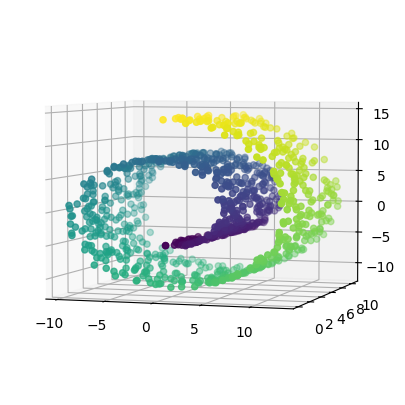

In [5]:
fig = plt.figure(figsize=(6, 5))

ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.view_init(4, -72)

plt.show()

# a) Reducción de la dimensionalidad usando Isomap

In [6]:
# Parámetros de Isomap

n_neighbors = 10
n_components = 2

In [7]:
# Training de Isomap

t0 = time()

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
Y_isomap = isomap.fit_transform(X)

t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))

Isomap: 0.19 sec


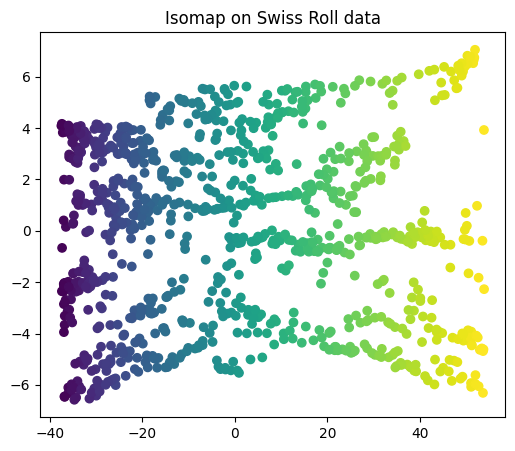

In [8]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("Isomap on Swiss Roll data")
plt.axis('tight')
plt.show()

# b) Reducción de la dimensionalidad usando LLE

In [13]:
# Parámetros de LLE

n_neighbors = 10
n_components = 2

In [14]:
# Training de LLE

t0 = time()

lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='auto', method='modified', random_state=0)
Y_lle = lle.fit_transform(X)

t1 = time()
print("LLE: %.2g seg" % (t1 - t0))

LLE: 0.51 seg


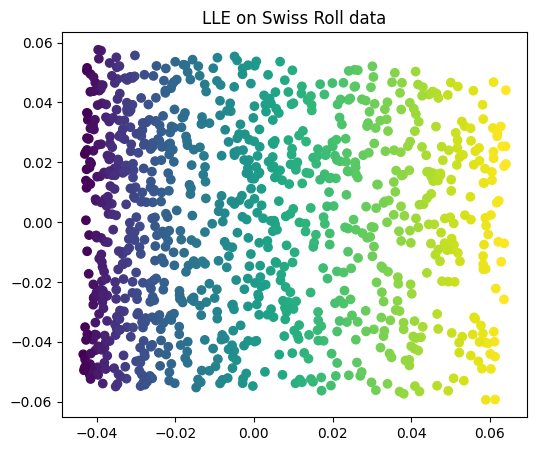

In [15]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_lle[:, 0], Y_lle[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("LLE on Swiss Roll data")
plt.axis('tight')
plt.show()

# c) Reducción de la dimensionalidad usando t-SNE

In [16]:
# Parámetros de t-SNE

n_components = 2

In [17]:
# Training de t-SNE

t0 = time()

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y_tsne = tsne.fit_transform(X)

t1 = time()
print("t-SNE: %.2g seg" % (t1 - t0))

t-SNE: 1.3 seg


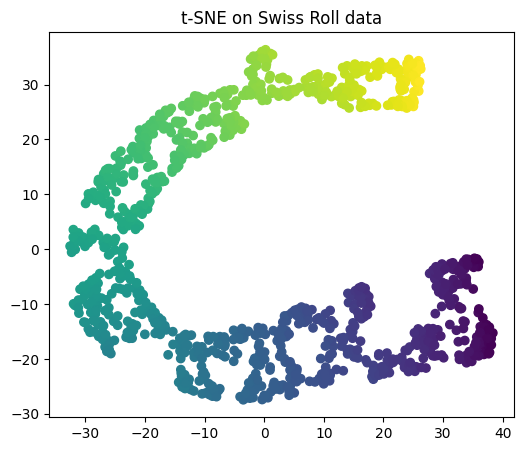

In [18]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("t-SNE on Swiss Roll data")
plt.axis('tight')
plt.show()